In [6]:
import pandas as pd



In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/internet_service_churn.csv')
print(df.head())

   id  is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
0  15                 1                            0             11.95   
1  18                 0                            0              8.22   
2  23                 1                            0              8.91   
3  27                 0                            0              6.87   
4  34                 0                            0              6.39   

   bill_avg  reamining_contract  service_failure_count  download_avg  \
0        25                0.14                      0           8.4   
1         0                 NaN                      0           0.0   
2        16                0.00                      0          13.7   
3        21                 NaN                      1           0.0   
4         0                 NaN                      0           0.0   

   upload_avg  download_over_limit  churn  
0         2.3                    0      0  
1         0.0                    0

In [9]:
#zastąpienie NAN wartoscia srednia
mean_value_age = df['subscription_age'].mean()
mean_value_bill = df['bill_avg'].mean()
mean_value_contract = df['reamining_contract'].mean()
mean_value_download = df['download_avg'].mean()
mean_value_upload = df['upload_avg'].mean()

df['subscription_age'].fillna(mean_value_age, inplace=True)
df['bill_avg'].fillna(mean_value_bill, inplace=True)
df['reamining_contract'].fillna(mean_value_contract, inplace=True)
df['download_avg'].fillna(mean_value_download, inplace=True)
df['upload_avg'].fillna(mean_value_upload, inplace=True)

columns_with_nan = df.columns[df.isnull().any()].tolist()
print("Kolumny z wartościami NaN:", columns_with_nan)
print(df)


Kolumny z wartościami NaN: []
            id  is_tv_subscriber  is_movie_package_subscriber  \
0           15                 1                            0   
1           18                 0                            0   
2           23                 1                            0   
3           27                 0                            0   
4           34                 0                            0   
...        ...               ...                          ...   
72269  1689648                 1                            1   
72270  1689676                 1                            0   
72271  1689679                 1                            0   
72272  1689733                 0                            0   
72273  1689744                 1                            1   

       subscription_age  bill_avg  reamining_contract  service_failure_count  \
0                 11.95        25            0.140000                      0   
1                  8.22      

<ipython-input-9-c3048c6dfd2b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['subscription_age'].fillna(mean_value_age, inplace=True)
<ipython-input-9-c3048c6dfd2b>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

Kolumna: id, Statystyka: 0.9544741995217023, P-wartość: 2.0405510312224703e-85
Kolumna 'id' nie ma rozkładu normalnego (p <= 0.05)
Kolumna: is_tv_subscriber, Statystyka: 0.4722561947181141, P-wartość: 9.76028199782854e-154
Kolumna 'is_tv_subscriber' nie ma rozkładu normalnego (p <= 0.05)
Kolumna: is_movie_package_subscriber, Statystyka: 0.5955905726496986, P-wartość: 2.4664420868399117e-145
Kolumna 'is_movie_package_subscriber' nie ma rozkładu normalnego (p <= 0.05)
Kolumna: subscription_age, Statystyka: 0.8850806872092419, P-wartość: 7.469613795969005e-109
Kolumna 'subscription_age' nie ma rozkładu normalnego (p <= 0.05)
Kolumna: bill_avg, Statystyka: 0.6476717704116177, P-wartość: 4.467243408610441e-141
Kolumna 'bill_avg' nie ma rozkładu normalnego (p <= 0.05)
Kolumna: reamining_contract, Statystyka: 0.9013966220247546, P-wartość: 8.882850027685242e-105
Kolumna 'reamining_contract' nie ma rozkładu normalnego (p <= 0.05)
Kolumna: service_failure_count, Statystyka: 0.3753587891580299, 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 72274.
  res = hypotest_fun_out(*samples, **kwds)


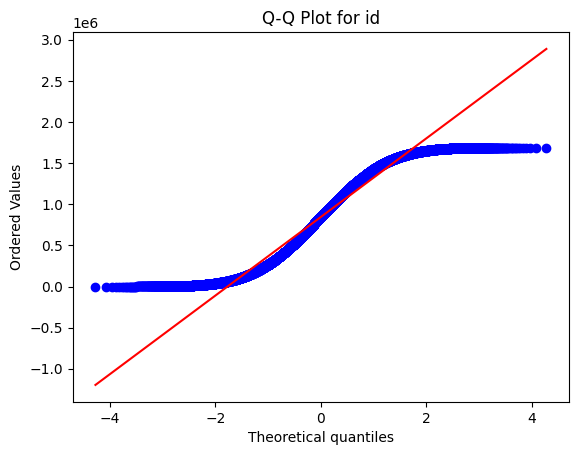

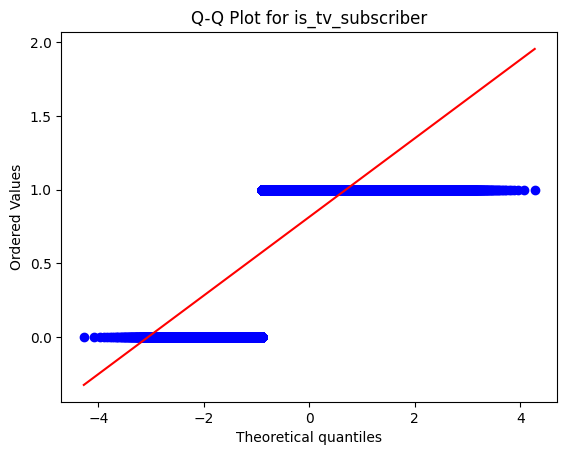

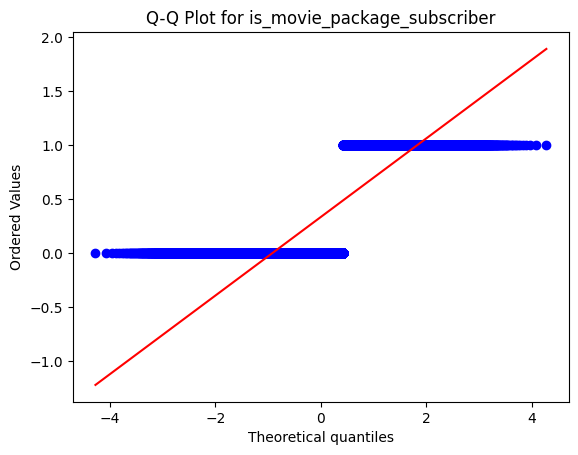

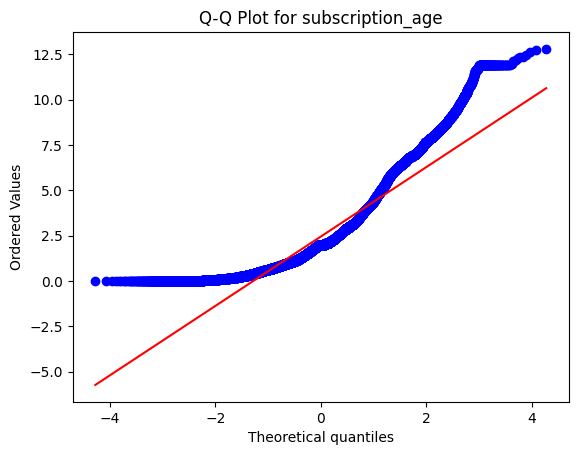

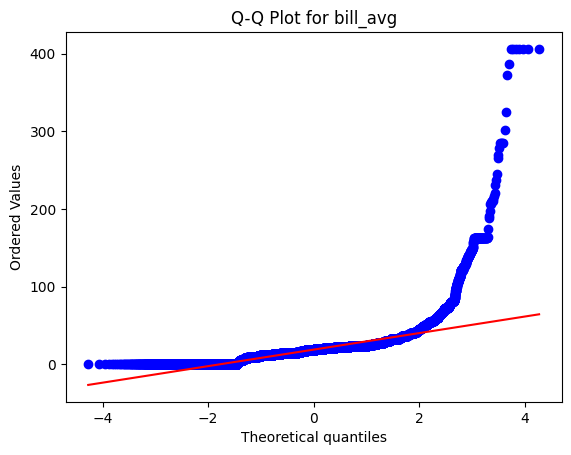

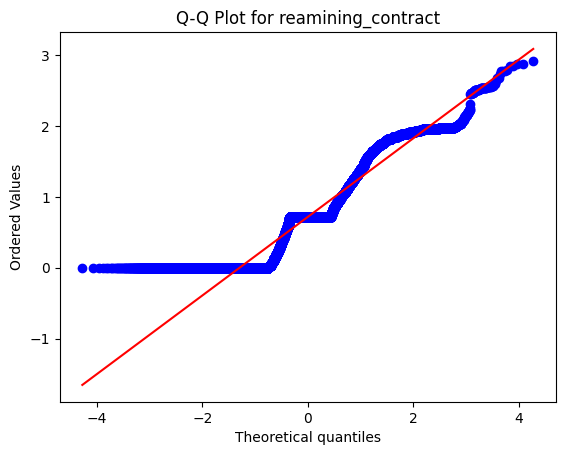

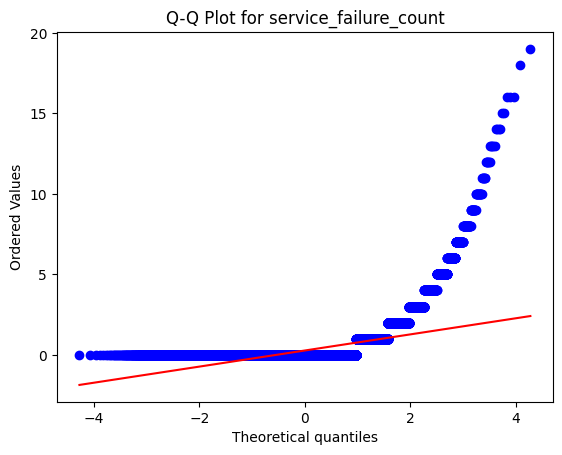

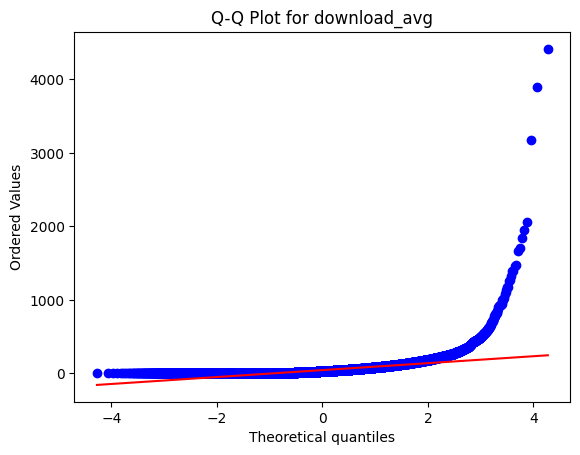

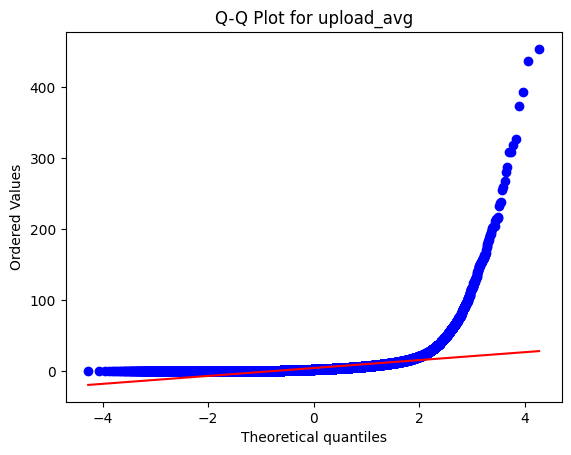

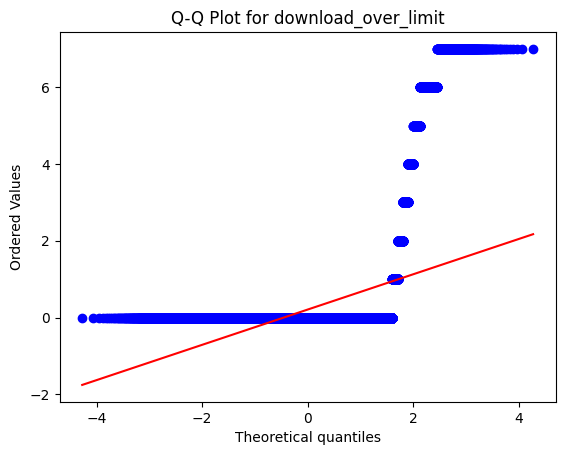

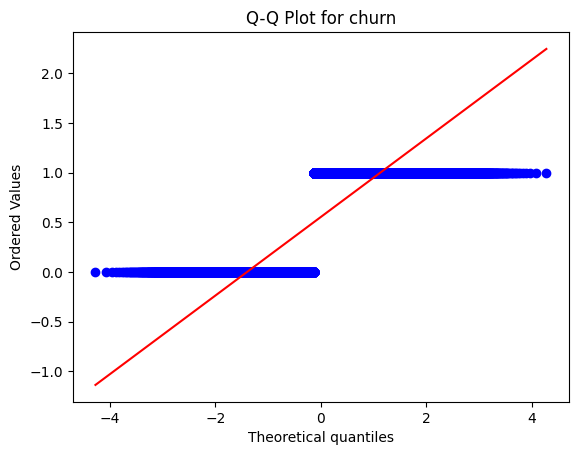

In [10]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro

# Test Shapiro-Wilka dla każdej kolumny
for column in df.columns:
    stat, p_value = shapiro(df[column].dropna())  # Pomijanie NaN
    print(f"Kolumna: {column}, Statystyka: {stat}, P-wartość: {p_value}")
    if p_value > 0.05:
        print(f"Kolumna '{column}' ma rozkład normalny (p > 0.05)")
    else:
        print(f"Kolumna '{column}' nie ma rozkładu normalnego (p <= 0.05)")

# Wykres Q-Q dla każdej kolumny
for column in df.columns:
    stats.probplot(df[column].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {column}")
    plt.show()

In [11]:
import pandas as pd
percentiles = [25, 50, 75]  # Możesz podać dowolne percentyle (np. 25%, 50%, 75%)

# Obliczenie percentyli
subscription_age_percentiles = df['subscription_age'].quantile([p / 100 for p in percentiles])
bill_avg_percentiles = df['bill_avg'].quantile([p / 100 for p in percentiles])
reamining_contract_percentiles = df['reamining_contract'].quantile([p / 100 for p in percentiles])
download_percentiles = df['download_avg'].quantile([p / 100 for p in percentiles])
upload_percentiles = df['upload_avg'].quantile([p / 100 for p in percentiles])

print("Percentyle dla subscription_age:\n", subscription_age_percentiles)
print("Percentyle dla bill_avg:\n", bill_avg_percentiles)
print("Percentyle dla reamining_contract:\n", reamining_contract_percentiles)
print("Percentyle dla download_avg:\n", download_percentiles)
print("Percentyle dla upload_avg:\n", upload_percentiles)

Percentyle dla subscription_age:
 0.25    0.93
0.50    1.98
0.75    3.30
Name: subscription_age, dtype: float64
Percentyle dla bill_avg:
 0.25    13.0
0.50    19.0
0.75    22.0
Name: bill_avg, dtype: float64
Percentyle dla reamining_contract:
 0.25    0.070000
0.50    0.716039
0.75    1.040000
Name: reamining_contract, dtype: float64
Percentyle dla download_avg:
 0.25     6.8
0.50    28.1
0.75    60.2
Name: download_avg, dtype: float64
Percentyle dla upload_avg:
 0.25    0.5
0.50    2.1
0.75    4.8
Name: upload_avg, dtype: float64


Macierz korelacji:
                                    id  is_tv_subscriber  \
id                           1.000000          0.282052   
is_tv_subscriber             0.282052          1.000000   
is_movie_package_subscriber  0.132197          0.337435   
subscription_age            -0.602241          0.087276   
bill_avg                     0.018718         -0.076245   
reamining_contract           0.273959          0.118952   
service_failure_count       -0.026589         -0.016041   
download_avg                 0.239691          0.131312   
upload_avg                   0.144977          0.065622   
download_over_limit         -0.228932         -0.103546   
churn                       -0.451142         -0.327582   

                             is_movie_package_subscriber  subscription_age  \
id                                              0.132197         -0.602241   
is_tv_subscriber                                0.337435          0.087276   
is_movie_package_subscriber          

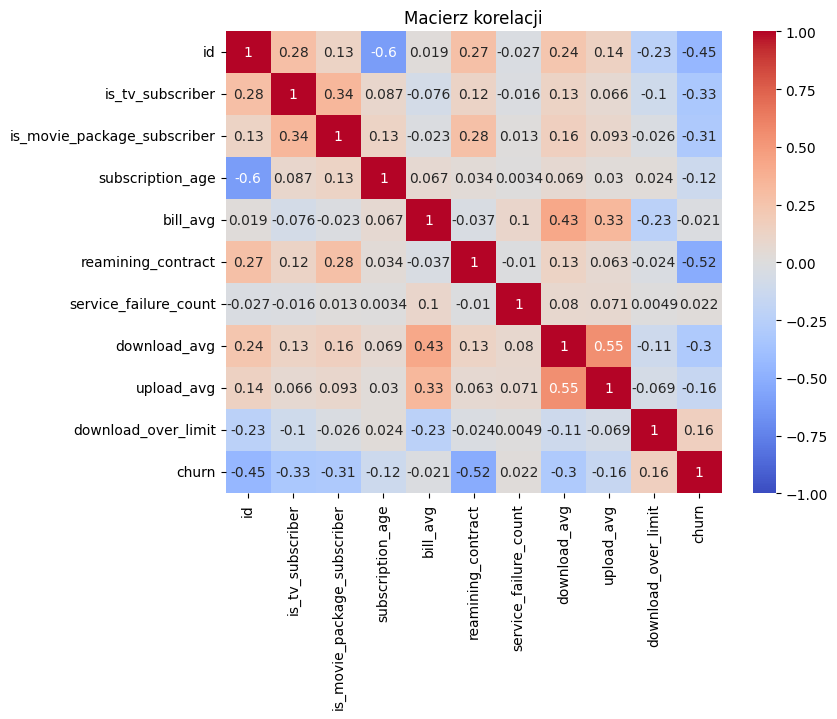

In [12]:
correlation_matrix = df.corr()
import seaborn as sns

print("Macierz korelacji:\n", correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Macierz korelacji")
plt.show()

In [13]:
# Standaryzacja danych dla wybranych kolumn
columns_to_standard = ['bill_avg', 'subscription_age', 'reamining_contract', 'download_avg', 'upload_avg']

df_standard = df.copy()  # Tworzenie kopii DataFrame
df_standard[columns_to_standard] = (df[columns_to_standard] - df[columns_to_standard].mean()) / df[columns_to_standard].std()

print("Dane po standaryzacji:\n", df_standard)

Dane po standaryzacji:
             id  is_tv_subscriber  is_movie_package_subscriber  \
0           15                 1                            0   
1           18                 0                            0   
2           23                 1                            0   
3           27                 0                            0   
4           34                 0                            0   
...        ...               ...                          ...   
72269  1689648                 1                            1   
72270  1689676                 1                            0   
72271  1689679                 1                            0   
72272  1689733                 0                            0   
72273  1689744                 1                            1   

       subscription_age  bill_avg  reamining_contract  service_failure_count  \
0              4.668303  0.458369       -9.865869e-01                      0   
1              2.835370 -1.433366  

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_standard['churn_encoded'] = label_encoder.fit_transform(df_standard['churn'])
df_standard['churn_encoded'] = df['churn'].replace({0: 'pozostaje', 1: 'odchodzi'})

# Wyświetlenie DataFrame po dodaniu kolumny z zakodowanymi danymi
print("\nDataFrame po dodaniu kolumny Label Encoding:\n", df_standard)


DataFrame po dodaniu kolumny Label Encoding:
             id  is_tv_subscriber  is_movie_package_subscriber  \
0           15                 1                            0   
1           18                 0                            0   
2           23                 1                            0   
3           27                 0                            0   
4           34                 0                            0   
...        ...               ...                          ...   
72269  1689648                 1                            1   
72270  1689676                 1                            0   
72271  1689679                 1                            0   
72272  1689733                 0                            0   
72273  1689744                 1                            1   

       subscription_age  bill_avg  reamining_contract  service_failure_count  \
0              4.668303  0.458369       -9.865869e-01                      0   
1           

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler

X = df_standard.drop(columns=['churn', 'churn_encoded', 'id'])
y = df_standard['churn']

# Skalowanie danych (opcjonalne, ale zalecane)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział na zestaw treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inicjalizacja modelu
model = RandomForestClassifier(random_state=42)

# Walidacja krzyżowa
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Średnia dokładność z walidacji krzyżowej:", cross_val_scores.mean())

# Uczenie modelu
model.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = model.predict(X_test)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nOcena modelu:")
print("Dokładność (Accuracy):", accuracy)
print("Czułość (Recall):", recall)
print("Precyzja (Precision):", precision)
print("Wynik F1 (F1 Score):", f1)

Średnia dokładność z walidacji krzyżowej: 0.9400024284570655

Ocena modelu:
Dokładność (Accuracy): 0.9423037011414735
Czułość (Recall): 0.9393824348266262
Precyzja (Precision): 0.954358446901517
Wynik F1 (F1 Score): 0.9468112244897959


In [18]:

from sklearn.linear_model import LogisticRegression


X = df_standard.drop(columns=['churn', 'churn_encoded', 'id'])  # Usuwamy niepotrzebne kolumny do uczenia
y = df_standard['churn']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział na zestaw treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inicjalizacja modelu regresji logistycznej
model = LogisticRegression(penalty='l2', solver='lbfgs', random_state=42, max_iter=1000)

# Walidacja krzyżowa
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Średnia dokładność z walidacji krzyżowej:", cross_val_scores.mean())

# Uczenie modelu
model.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = model.predict(X_test)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nOcena modelu:")
print("Dokładność (Accuracy):", accuracy)
print("Czułość (Recall):", recall)
print("Precyzja (Precision):", precision)
print("Wynik F1 (F1 Score):", f1)


Średnia dokładność z walidacji krzyżowej: 0.8159774451441075

Ocena modelu:
Dokładność (Accuracy): 0.8178484953303355
Czułość (Recall): 0.8683877499367249
Precyzja (Precision): 0.8115907746895328
Wynik F1 (F1 Score): 0.8390291618267408


In [22]:
from sklearn.svm import SVC

X = df_standard.drop(columns=['churn', 'churn_encoded', 'id'])  # Usuwamy niepotrzebne kolumny do uczenia
y = df_standard['churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział na zestaw treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inicjalizacja modelu regresji logistycznej
model = SVC(C=0.01, random_state=42, max_iter=1000)

# Walidacja krzyżowa
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Średnia dokładność z walidacji krzyżowej:", cross_val_scores.mean())

# Uczenie modelu
model.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = model.predict(X_test)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nOcena modelu:")
print("Dokładność (Accuracy):", accuracy)
print("Czułość (Recall):", recall)
print("Precyzja (Precision):", precision)
print("Wynik F1 (F1 Score):", f1)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

Średnia dokładność z walidacji krzyżowej: 0.6933704782364268


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Ocena modelu:
Dokładność (Accuracy): 0.6773434797647873
Czułość (Recall): 0.7427233611743862
Precyzja (Precision): 0.6904705882352942
Wynik F1 (F1 Score): 0.7156444336056579


In [27]:

from sklearn.ensemble import GradientBoostingClassifier

X = df_standard.drop(columns=['churn', 'churn_encoded', 'id'])  # Usuwamy niepotrzebne kolumny do uczenia
y = df_standard['churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział na zestaw treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inicjalizacja Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0)

# Walidacja krzyżowa
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Średnia dokładność z walidacji krzyżowej:", cross_val_scores.mean())

# Uczenie modelu
model.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = model.predict(X_test)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nOcena modelu:")
print("Dokładność (Accuracy):", accuracy)
print("Czułość (Recall):", recall)
print("Precyzja (Precision):", precision)
print("Wynik F1 (F1 Score):", f1)


Średnia dokładność z walidacji krzyżowej: 0.9365606709074823

Ocena modelu:
Dokładność (Accuracy): 0.9369768246281563
Czułość (Recall): 0.9328018223234624
Precyzja (Precision): 0.9509740678622113
Wynik F1 (F1 Score): 0.9418002938733789


Tabela wyników:
+----+----------------------------+----------------------------------+------------+----------+-------------+------------+
|    | Model                      |   Cross-Validation Accuracy Mean |   Accuracy |   Recall |   Precision |   F1 Score |
+====+============================+==================================+============+==========+=============+============+
|  0 | RandomForestClassifier     |                         0.940002 |   0.942304 | 0.939382 |    0.954358 |   0.946811 |
+----+----------------------------+----------------------------------+------------+----------+-------------+------------+
|  1 | LogisticRegression         |                         0.815977 |   0.817848 | 0.868388 |    0.811591 |   0.839029 |
+----+----------------------------+----------------------------------+------------+----------+-------------+------------+
|  2 | Support Vector Classifier  |                       nan        |   0.677343 | 0.742723 |    0.690471 |   0.715644 |
+----+--

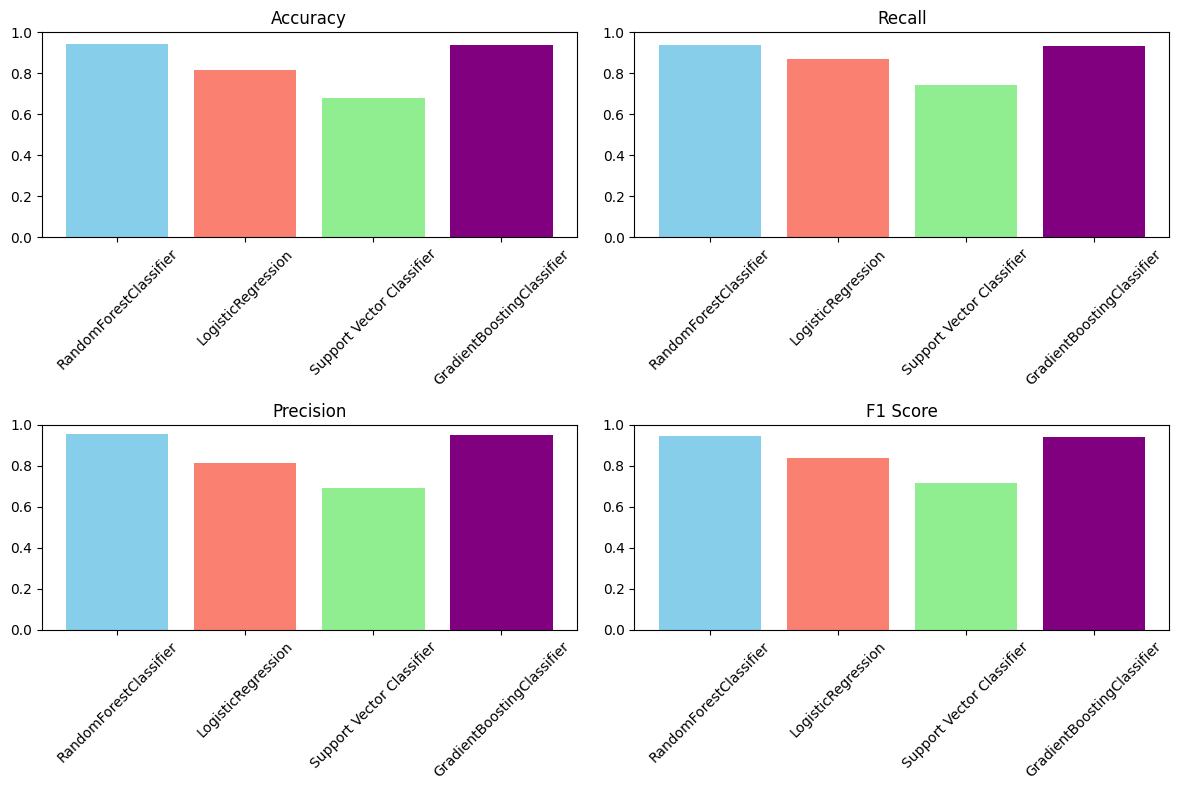

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate


# Dane wyników dla każdego modelu
data = {
    "Model": ["RandomForestClassifier", "LogisticRegression", "Support Vector Classifier", "GradientBoostingClassifier"],
    "Cross-Validation Accuracy Mean": [0.9400024284570655, 0.8159774451441075, None, 0.9365606709074823],
    "Accuracy": [0.9423037011414735, 0.8178484953303355, 0.6773434797647873, 0.9369768246281563],
    "Recall": [0.9393824348266262, 0.8683877499367249, 0.7427233611743862, 0.9328018223234624],
    "Precision": [0.954358446901517, 0.8115907746895328, 0.6904705882352942, 0.9509740678622113],
    "F1 Score": [0.9468112244897959, 0.8390291618267408, 0.7156444336056579, 0.9418002938733789]
}

# Tworzenie DataFrame z danymi
df_results = pd.DataFrame(data)

# Wyświetlenie tabeli wyników
#print("Tabela wyników:")
#print(df_results)

# Wyświetlenie tabeli z liniami oddzielającymi wiersze i kolumny
print("Tabela wyników:")
print(tabulate(df_results, headers="keys", tablefmt="grid"))

# Utworzenie wykresu słupkowego dla każdej z miar
metrics = ["Accuracy", "Recall", "Precision", "F1 Score"]
df_metrics = df_results.melt(id_vars="Model", value_vars=metrics, var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    subset = df_metrics[df_metrics["Metric"] == metric]
    plt.bar(subset["Model"], subset["Score"], color=["skyblue", "salmon", "lightgreen", "purple"])
    plt.title(metric)
    plt.ylim(0, 1)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Nowa sekcja